# Hi-C features like Virtual4C, DiScore, InsuScore

Virual4C track is for mimic 4C data track from Hi-C contact matrix.

DiScore and InsuScore represents the interaction bias between TAD and non-TAD regions.

In [13]:
import coolbox
from coolbox.api import *

In [14]:
coolbox.__version__

'0.2.6'

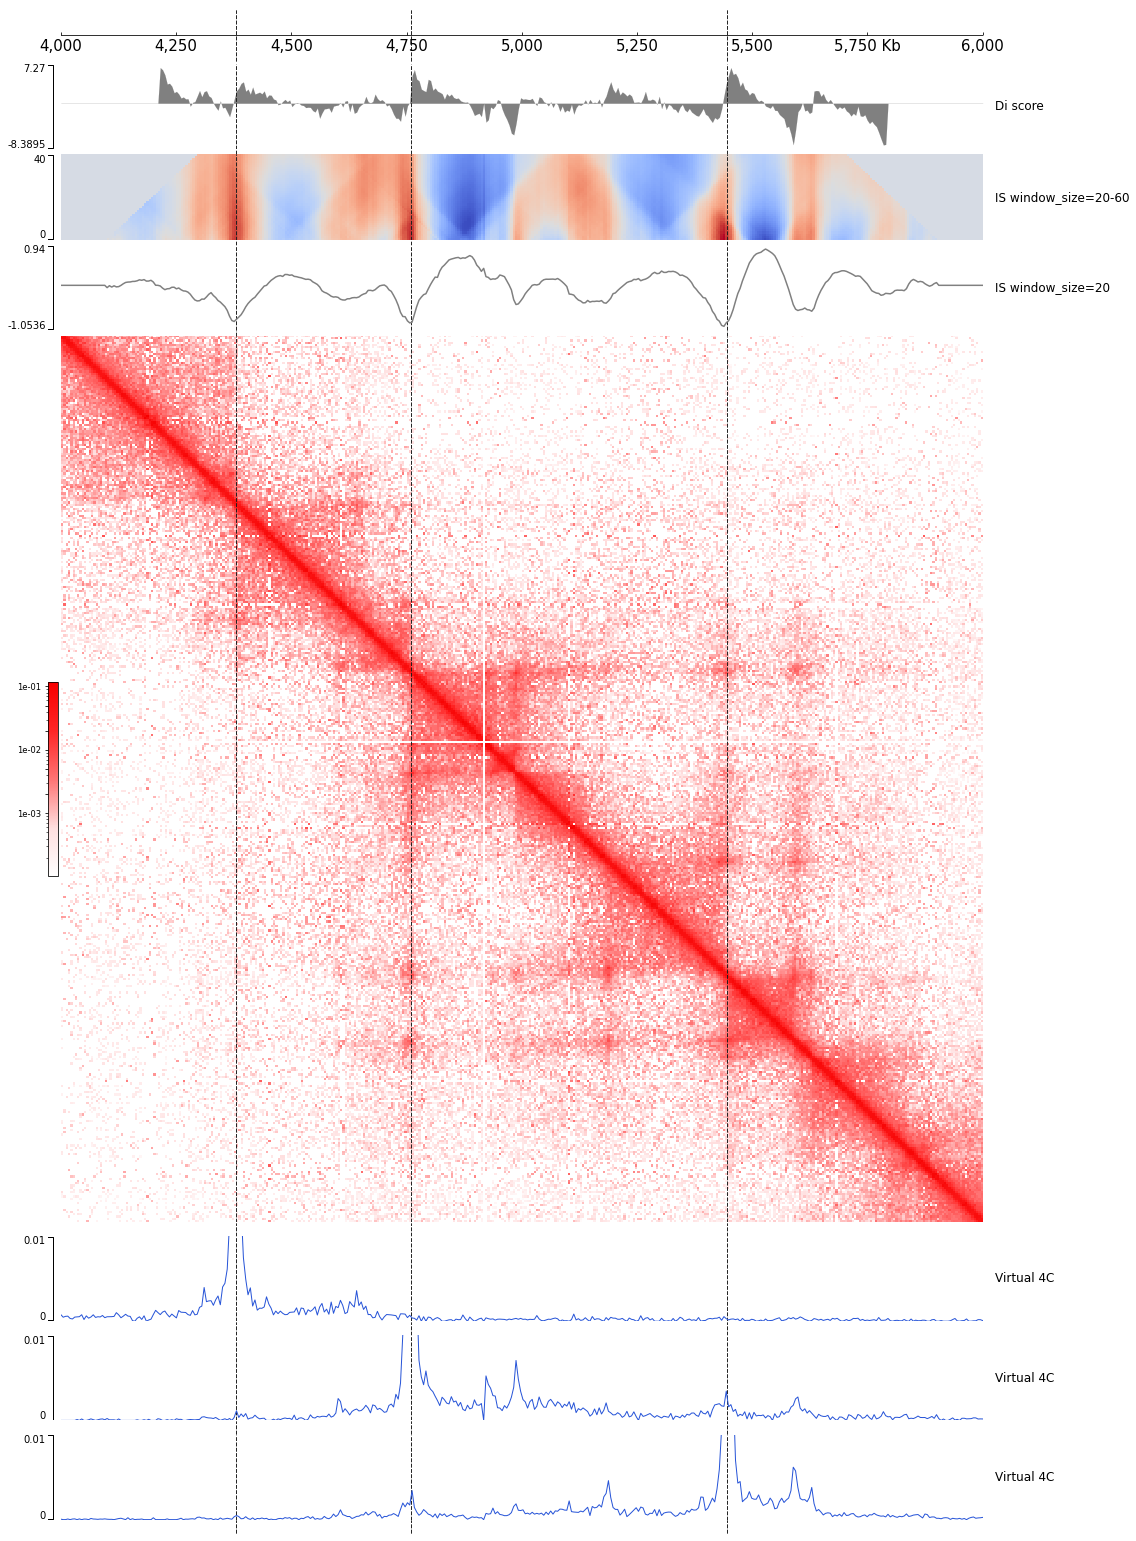

In [15]:
example_cool = "../../../tests/test_data/cool_chr9_4000000_6000000.mcool"
test_region = "chr9:4000000-6000000"

cool_track = Cool(example_cool, style="matrix")

loci = ["chr9:4380000-4380000", "chr9:4760000-4760000", "chr9:5445000-5445000"]

frame = XAxis() \
        + DiScore(cool_track) + Title("Di score") + Spacer(0.2) \
        + InsuScore(cool_track, window_size="20-60", style="heatmap") + Title("IS window_size=20-60") + Spacer(0.2) \
        + InsuScore(cool_track) + Title("IS window_size=20") + Spacer(0.2) \
        + cool_track + Spacer(0.5)
for l in loci:
    track = Virtual4C(cool_track, l, bin_width=5) + MinValue(0) + Title("Virtual 4C")
    track +=  MaxValue(0.015)
    frame += track + Spacer(0.5)
frame *= Vlines(loci)

frame.plot(test_region)

### CLI code

In [16]:
%%bash

cool_file=../../../tests/test_data/cool_chr9_4000000_6000000.mcool
loci1="chr9:4380000-4380000"
loci2="chr9:4760000-4760000"
loci3="chr9:5445000-5445000"

coolbox add XAxis - \
    add DiScore ${cool_file} - \
    add InsuScore ${cool_file} --window_size 20-60 --style heatmap - \
    add InsuScore ${cool_file} - \
    start_with Vlines "['${loci1}', '${loci2}', '${loci3}']" - \
    add Cool ${cool_file} --style "matrix" - \
    start_with MaxValue "0.015" - \
    start_with MinValue "0" - \
    add Virtual4C ${cool_file} "${loci1}" --bin_width 5 - \
    add Virtual4C ${cool_file} "${loci2}" --bin_width 5 - \
    add Virtual4C ${cool_file} "${loci3}" --bin_width 5 - \
    goto "chr9:4000000-6000000" - \
    plot /tmp/test_cli_hicfeature.png